<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/Regress%C3%A3o_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importando base de dados

In [4]:
df_curso = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','CO_IES','CO_UF','CO_MUNICIPIO','NO_CURSO','IN_AJUDA_DEFICIENTE','QT_MATRICULA_TOTAL','QT_CONCLUINTE_TOTAL'])
df_curso_2 = df_curso.fillna(0)
df_curso_2.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,NO_CURSO,IN_AJUDA_DEFICIENTE,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,DIREITO,1,447,75
1,2019,1,51.0,5103403.0,CIÊNCIAS ECONÔMICAS,0,323,28
2,2019,1,51.0,5103403.0,ENGENHARIA CIVIL,0,248,45
3,2019,1,51.0,5103403.0,PEDAGOGIA,1,331,53
4,2019,1,51.0,5103403.0,SERVIÇO SOCIAL,1,274,32


Text(0, 0.5, 'Concluintes')

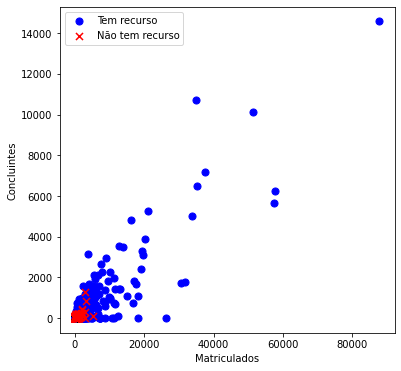

In [8]:
positive = df_curso_2[df_curso_2['IN_AJUDA_DEFICIENTE'].isin([1])]  
negative = df_curso_2[df_curso_2['IN_AJUDA_DEFICIENTE'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6)) 
ax.scatter(positive['QT_MATRICULA_TOTAL'], positive['QT_CONCLUINTE_TOTAL'], s=50, c='b', marker='o', label='Tem recurso')  
ax.scatter(negative['QT_MATRICULA_TOTAL'], negative['QT_CONCLUINTE_TOTAL'], s=50, c='r', marker='x', label='Não tem recurso')  
ax.legend()  
ax.set_xlabel('Matriculados')  
ax.set_ylabel('Concluintes') 

In [32]:
X = df_curso_2['IN_AJUDA_DEFICIENTE'].values
X = x.reshape(-1, 1)
y = df_curso_2['QT_CONCLUINTE_TOTAL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [43]:
modelo = LogisticRegression()

In [45]:
modelo.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [47]:
y_pred = modelo.predict(X_test)

In [49]:
modelo.score(X_test, y_test)

0.2942765905183002

In [50]:
print(confusion_matrix(y_test, y_pred))

[[3594    0    0 ...    0    0    0]
 [ 353    0    0 ...    0    0    0]
 [ 217    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]


In [51]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.29      1.00      0.45      3594
           1       0.00      0.00      0.00       353
           2       0.00      0.00      0.00       217
           3       0.00      0.00      0.00       232
           4       0.00      0.00      0.00       188
           5       0.00      0.00      0.00       200
           6       0.00      0.00      0.00       212
           7       0.00      0.00      0.00       237
           8       0.00      0.00      0.00       199
           9       0.00      0.00      0.00       196
          10       0.00      0.00      0.00       204
          11       0.00      0.00      0.00       202
          12       0.00      0.00      0.00       203
          13       0.00      0.00      0.00       188
          14       0.00      0.00      0.00       200
          15       0.00      0.00      0.00       196
          16       0.00      0.00      0.00       184
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
y_pred_prob = modelo.predict_proba(X_test)[:,1]

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

ValueError: ignored